In [1]:
from baixa_curvas import bmf
from datetime import date, timedelta, datetime
import pandas as pd
from business_days.bizdays import Calendar, VectorizedOps

cal = Calendar()
cal.load(filename='business_days/ANBIMA.cal')

C:\Users\maike\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\maike\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\maike\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Calendar: ANBIMA
Start: 2000-01-01
End: 2078-12-25
Weekdays: 
Holidays: 948
Financial: True

In [2]:
import contextlib
df_pre_full = pd.read_csv('vertices_di.csv')
with contextlib.suppress(Exception):
    df_pre_full = df_pre_full.drop(columns='Unnamed: 0')

In [3]:
start_date = datetime.strptime(df_pre_full['Data'].iloc[-1], '%Y-%m-%d') + timedelta(1)
start_date = str(start_date.date())
yesterday = str(date.today() - timedelta(1))

lista_de_dias = cal.seq(start_date, yesterday)

In [4]:
# sourcery skip: remove-str-from-print

for dia in lista_de_dias:
    gera_bmf = bmf(dia)
    df_pre = gera_bmf._baixa_pre()
    df_pre.reset_index(inplace=True)
    df_pre['Data'] = dia
    df_pre.columns = ['vertices','taxas252', 'taxas360', 'Data']
    df_pre_full = df_pre_full.append(df_pre)
    print(str(dia))

2022-04-19
2022-04-18


In [5]:
df_pre_full.to_csv('vertices_di.csv')

In [14]:
with contextlib.suppress(Exception):
    df_pre_full['Data'] = df_pre_full['Data'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

In [15]:
df_pre_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814142 entries, 0 to 262
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   vertices  814142 non-null  object        
 1   taxas252  814142 non-null  float64       
 2   taxas360  814142 non-null  float64       
 3   Data      814142 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.1+ MB


<AxesSubplot:xlabel='Data'>

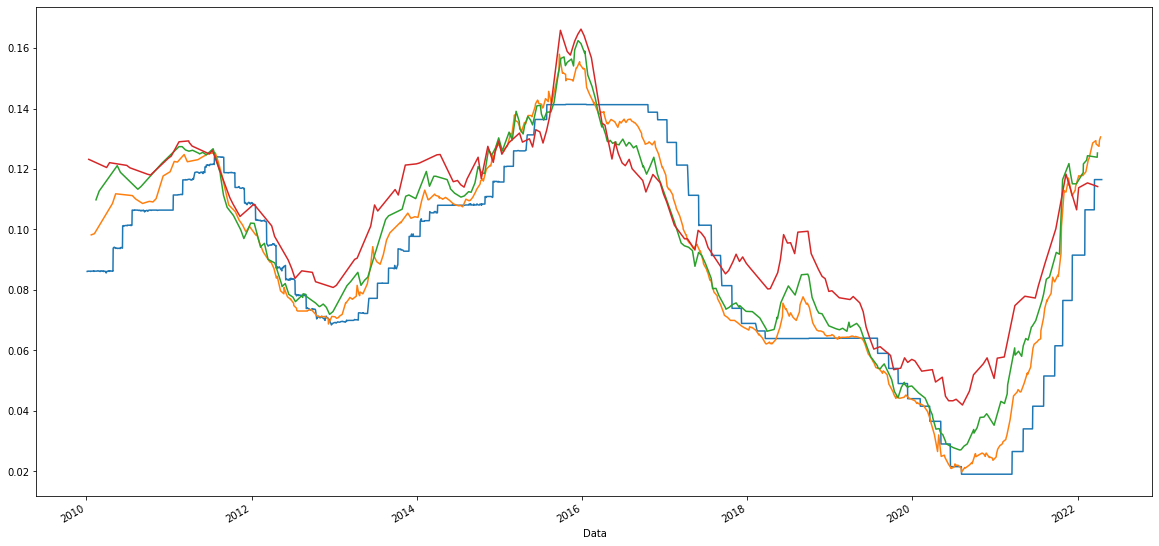

In [23]:
df_pre_full[df_pre_full['vertices']==1].set_index("Data")['taxas252'].plot(figsize=(20,10))
df_pre_full[df_pre_full['vertices']==252].set_index("Data")['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==504].set_index("Data")['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==1008].set_index("Data")['taxas252'].plot()